In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
from tensorflow.keras.layers import Flatten

In [31]:
DATADIR = "C:\\Users\\35387\\Downloads\\pets"

In [32]:
CATAGORIES = ["dogs","cats"]

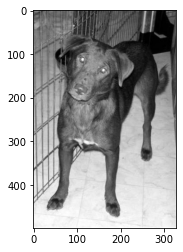

In [33]:
for category in CATAGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)   
        plt.imshow(img_array, cmap="gray")
        break
    break

In [34]:
print(img_array.shape)

(499, 327)


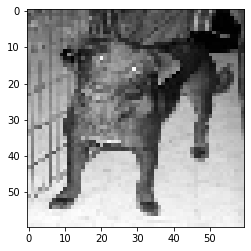

In [35]:
imgsize = 60

new_array = cv2.resize(img_array, (imgsize,imgsize) )
plt.imshow(new_array, cmap="gray")

In [36]:
training_data = []

def create_training_data():
    for category in CATAGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATAGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)   
                new_array = cv2.resize(img_array, (imgsize,imgsize) )
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()    

In [37]:
print(len(training_data))

8005


In [38]:
import random

random.shuffle(training_data)

In [39]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
1
1
1
1
1
1


In [40]:
X = []
y = []

In [41]:
for features,label in training_data:
        X.append(features)
        y.append(label)
X = np.array(X).reshape(-1, imgsize, imgsize, 1)    

In [42]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [43]:
X[1]

array([[[ 13],
        [ 13],
        [ 17],
        ...,
        [194],
        [194],
        [194]],

       [[ 14],
        [ 13],
        [ 13],
        ...,
        [194],
        [194],
        [194]],

       [[ 27],
        [ 12],
        [ 16],
        ...,
        [194],
        [194],
        [194]],

       ...,

       [[ 66],
        [ 78],
        [ 90],
        ...,
        [ 83],
        [ 75],
        [ 68]],

       [[ 79],
        [ 79],
        [ 76],
        ...,
        [ 80],
        [ 82],
        [ 70]],

       [[ 74],
        [ 81],
        [ 86],
        ...,
        [ 70],
        [ 76],
        [ 71]]], dtype=uint8)

In [44]:
y[1]

0

In [45]:
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

In [46]:
X.shape

(8005, 60, 60, 1)

In [49]:
imgsize=60
X = np.array(X).reshape(-1,imgsize,imgsize,1)
y = np.array(y)
#y = np.array(y).tolist()

In [50]:
X = X/255.0

dense_layers = [2]
layer_sizes = [128]
conv_layers = [1]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)
            tensorboard = TensorBoard(log_dir='C:\\Users\\35387\\jupyter\\logs\\{}'.format(NAME))
            print(NAME)


            model = Sequential()

            model.add(Conv2D(layer_size, (3,3), input_shape = X.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3,3)))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())

            for l in range(dense_layer):
                model.add(Dense(256))
                model.add(Activation("relu"))
                
            model.add(Dense(1))
            model.add(Activation("sigmoid"))

            model.compile(loss="binary_crossentropy",
                          optimizer="adam",
                          metrics = ["accuracy"])

            model.fit(X, y, batch_size=32,epochs=10, validation_split=0.3, callbacks = [tensorboard])

1-conv-128-nodes-2-dense-1599777789
1-conv-128-nodes-2-dense-1599777789
Train on 5603 samples, validate on 2402 samples
Epoch 1/10
5603/5603 [==============================] - 34s 6ms/sample - loss: 0.6933 - accuracy: 0.4992 - val_loss: 0.6937 - val_accuracy: 0.4871
Epoch 2/10
5603/5603 [==============================] - 35s 6ms/sample - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6936 - val_accuracy: 0.4871
Epoch 3/10
5603/5603 [==============================] - 35s 6ms/sample - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6933 - val_accuracy: 0.4871
Epoch 4/10
5603/5603 [==============================] - 35s 6ms/sample - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6933 - val_accuracy: 0.4871
Epoch 5/10
5603/5603 [==============================] - 35s 6ms/sample - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6934 - val_accuracy: 0.4871
Epoch 6/10
5603/5603 [==============================] - 35s 6ms/sample - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6936 - val_accuracy: 0.487

In [51]:
model.save("tensorcatordog")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: tensorcatordog\assets


In [52]:
y = np.array(y).tolist()

In [55]:
def prepare(filepath):
    img_size = 60
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  
    img_array = img_array/255.0
    new_array = cv2.resize(img_array, (img_size, img_size))
    return new_array.reshape(-1, img_size , img_size, 1)

model = tf.keras.models.load_model("tensorcatordog")

prediction = model.predict([prepare("dogu.jpg")])
print(prediction)

print(CATAGORIES[int(prediction)])

[[0.8537494]]
dogs
